In [6]:
from histolab.slide import Slide
import matplotlib.pyplot as plt
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [7]:
BASE_PATH = "/kuacc/users/skoc21/dataset/pannet/wsi/"
os.chdir(BASE_PATH)

In [8]:
def mkdir_if_not_exist(inputdir):
    if not os.path.exists(inputdir):
        os.makedirs(inputdir)
    return inputdir

In [9]:
PATH_PANNET = "/kuacc/users/skoc21/dataset/pannet/wsi/HE__20211011_160350_(3).tiff"
fname_img = PATH_PANNET.split('/')[-1].split('.')[0]
PATH_PROCESSED = "wsi-tiles/" + fname_img

pannet_slide = Slide(PATH_PANNET, processed_path=mkdir_if_not_exist(PATH_PROCESSED))

In [10]:
print(f"Slide name: {pannet_slide.name}")
print(f"Levels: {pannet_slide.levels}")
print(f"Dimensions at level 0: {pannet_slide.dimensions}")
print(f"Dimensions at level 1: {pannet_slide.level_dimensions(level=1)}")
print(f"Dimensions at level 2: {pannet_slide.level_dimensions(level=2)}")


Slide name: HE__20211011_160350_(3)
Levels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Dimensions at level 0: (199168, 86528)
Dimensions at level 1: (99584, 43264)
Dimensions at level 2: (49792, 21632)


In [11]:
%matplotlib inline
pannet_slide.thumbnail
pannet_slide.show()

display: unable to open X server `' @ error/display.c/DisplayImageCommand/431.


## Random Tile Extractor

In [12]:
from histolab.tiler import RandomTiler
from histolab.tiler import GridTiler

In [ ]:
random_tiles_extractor = RandomTiler(
    tile_size=(1024, 1024),
    n_tiles=200,
    level=0,
    seed=2021,
    check_tissue=True, # default
    tissue_percent=80.0, # default
    prefix="random/", # save tiles in the "random" subdirectory of slide's processed_path
    suffix=".png" # default
)

In [ ]:
random_tiles_extractor.locate_tiles(
    slide=pannet_slide,
    scale_factor=128,
    alpha=255,
    outline="red"
)

## Grid Extractor

In [19]:
grid_tiles_extractor = GridTiler(
   tile_size=(512, 512),
   level=1,
   check_tissue=True,
   tissue_percent=70,
   pixel_overlap=0, # default
   prefix="grid" + fname_img, # save tiles in the "grid" subdirectory of slide's processed_path
   suffix=".png" # default,
#    mpp = 0.5
)

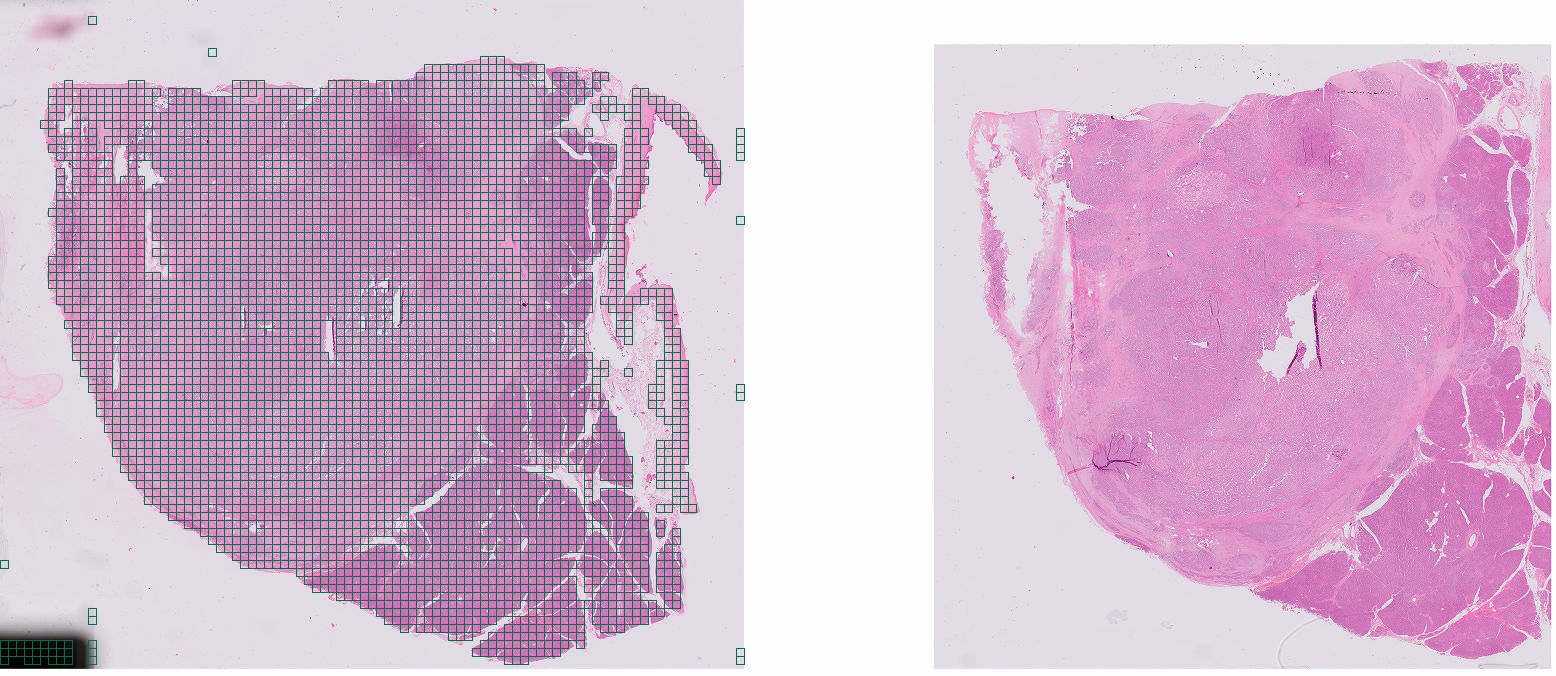

In [20]:
grid_tiles_extractor.locate_tiles(
    slide=pannet_slide,
    scale_factor=128,
    alpha=255,
    outline="#046C4C"
)

In [21]:
grid_tiles_extractor.extract(pannet_slide)

# ARCHIVE

In [ ]:
import openslide
osh = openslide.OpenSlide(PATH_PANNET)
osh.properties


In [ ]:
osh.properties['tiff.Software']

In [ ]:
openslide.PROPERTY_NAME_OBJECTIVE_POWER

In [ ]:
osh.properties[openslide.PROPERTY_NAME_OBJECTIVE_POWER]

In [ ]:
osh.properties[openslide.PROPERTY_NAME_MPP_X]

In [ ]:
osh.properties